In [ ]:
# Beginning of "prototype_notebook.ipynb"

Want to practice creating some plots that will be used in Shiny.

In [1]:
# Import necessary libraries and modules
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import openpyxl
import matplotlib.pyplot as plt

Will now import the Excel file but only need first sheet to perform some analysis.

In [2]:
# Location of the downloaded
file_loc = "~/Downloads/Supply chain logisitcs problem.xlsx"
print(file_loc)

~/Downloads/Supply chain logisitcs problem.xlsx


In [3]:
# Import excel sheet onto a variable for some initial analysis
order_list = pd.read_excel(
    file_loc,
    sheet_name=0
)
order_list.head(20)

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34
5,1.447351e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3332,92.80
6,1.447320e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,1782,46.90
7,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,427,2.86
8,1.447219e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,1291,26.60
9,1.447398e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2294,62.20


In [4]:
# Get the columns from dataframe
order_list.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

Count occurences of "V44_3".

In [5]:
print(order_list['Carrier'].value_counts()["V44_3"])

854


In [6]:
print(order_list['Carrier'].value_counts())

Carrier
V444_0    6264
V444_1    2097
V44_3      854
Name: count, dtype: int64


So, "V44_3" accounts for about 9% of the raw data. Will proceed with removing these records.

## Section 2: Initial Plots

First, gather the top ten products IDs, i.e. those product IDs that get ordered the most. Quality what percentage of 

In [7]:
# store total number of records in a variable
total_records = len(order_list)
total_records

9215

Want a dataframe with the product ID's and counts for each in descending order. In a new column will calculate the percentage of share for total orders each has. Will then trim the dataframe to 10 records, and compute the sum of the percentages the top 10 share.

In [8]:
result_df = order_list.groupby('Product ID').size().reset_index(name='Count').sort_values('Count', ascending=False)
# Perform calculation to get the percentages
result_df["Percent of Total Orders (%)"] = round((result_df["Count"]/total_records)*100, 2)
top_ten = result_df.head(10)
top_ten

,Product ID,Count,Percent of Total Orders (%)
449,1689547,192,2.08
250,1677878,140,1.52
450,1689548,133,1.44
448,1689546,129,1.40
419,1688571,120,1.30
427,1688629,119,1.29
404,1687346,118,1.28
420,1688575,117,1.27
422,1688589,112,1.22
161,1668545,101,1.10


In [9]:
# Sanity check
type(result_df)

pandas.core.frame.DataFrame

In [10]:
top_ten

,Product ID,Count,Percent of Total Orders (%)
449,1689547,192,2.08
250,1677878,140,1.52
450,1689548,133,1.44
448,1689546,129,1.40
419,1688571,120,1.30
427,1688629,119,1.29
404,1687346,118,1.28
420,1688575,117,1.27
422,1688589,112,1.22
161,1668545,101,1.10


The total share that the top 10 orders own.

In [11]:
print(f"The total percentage (%) of the top 10 orders: {top_ten['Percent of Total Orders (%)'].sum():.2f}")

The total percentage (%) of the top 10 orders: 13.90


Will now filter by the product ID with most occurences in the dataframe, then create a boxplot of unit quantity (or weight).

In [12]:
print(order_list.dtypes)

Order ID                       float64
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                              int64
Service Level                   object
Ship ahead day count             int64
Ship Late Day count              int64
Customer                        object
Product ID                       int64
Plant Code                      object
Destination Port                object
Unit quantity                    int64
Weight                         float64
dtype: object


In [13]:
prod_1 = order_list[order_list['Product ID'] == 1689547]

In [14]:
prod_1.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
1244,1.447339e+09,2013-05-26,PORT04,V444_0,2,DTP,0,0,V555555555555555_29,1689547,PLANT03,PORT09,650,29.794509
1245,1.447214e+09,2013-05-26,PORT04,V444_0,2,DTP,0,0,V555555555555555_29,1689547,PLANT03,PORT09,933,41.191763
1246,1.447283e+09,2013-05-26,PORT04,V444_0,2,DTP,0,0,V555555555555555_29,1689547,PLANT03,PORT09,546,22.595882
1247,1.447356e+09,2013-05-26,PORT04,V444_0,2,DTP,0,0,V555555555555555_29,1689547,PLANT03,PORT09,886,42.191763
1248,1.447388e+09,2013-05-26,PORT04,V444_0,2,DTP,0,0,V555555555555555_29,1689547,PLANT03,PORT09,785,36.993136


<Axes: xlabel='Unit quantity', ylabel='Weight'>

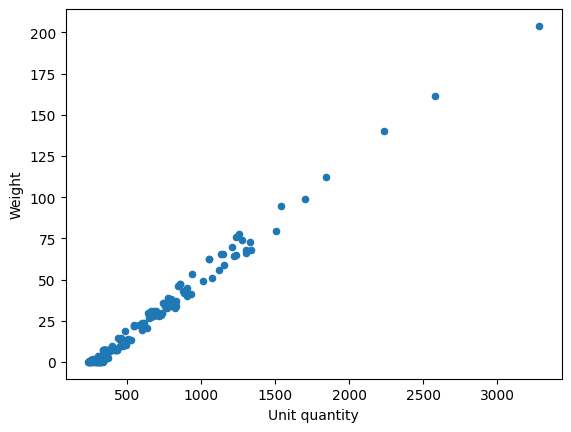

In [15]:
# Creating a scatter plot
prod_1.plot.scatter(x='Unit quantity', y='Weight')

Plot above depicts a linear relationship between units ordered and weight. This is probably expected behavior because one would think that the more units (of similar size) ordered, the weight will increase as well on a linear scale.

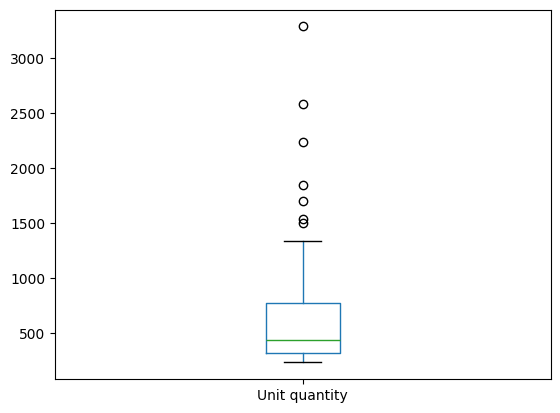

In [16]:
boxplot1 = prod_1.boxplot(column=['Unit quantity'], grid=False)

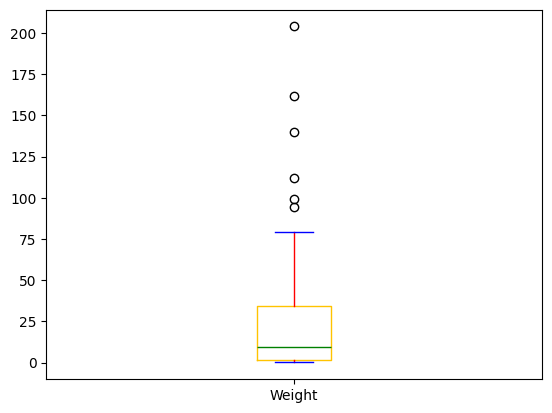

In [17]:
boxplot2 = prod_1.boxplot(column=['Weight'], grid=False, color=dict(boxes='#FFC300', whiskers='r', medians='g', caps='b'),) 

## Section 3

Will prototype how to calculate the transportation costs for the data frame. First, import the freight_rates page from the main spreadsheet.

In [19]:
freight_rates = pd.read_excel(
    file_loc,
    sheet_name=1
)
freight_rates.head()

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0


In [20]:
order_list.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [ ]:
# End of "prototype_notebook.ipynb"